# LeNet-5 Implementation for MNIST Classification

### Load and preprocess the data

In [5]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Завантаження та попередня обробка даних
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Нормалізація даних
x_train, x_test = x_train / 255.0, x_test / 255.0

# Додавання каналу для ч/б зображень
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Розділення на тренувальну та валідаційну вибірки
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


### Build the LeNet-5 model

In [6]:

# Побудова моделі LeNet-5
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\Misha\PycharmProjects\CV\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile and train the model

In [7]:

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8331 - loss: 0.5203 - val_accuracy: 0.9641 - val_loss: 0.1227
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9714 - loss: 0.0936 - val_accuracy: 0.9811 - val_loss: 0.0612
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9812 - loss: 0.0630 - val_accuracy: 0.9814 - val_loss: 0.0654
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9851 - loss: 0.0478 - val_accuracy: 0.9829 - val_loss: 0.0606
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9877 - loss: 0.0396 - val_accuracy: 0.9865 - val_loss: 0.0464
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9882 - val_loss: 0.0417
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9926 - loss: 0.0237 - val_accuracy: 0.9877 - val_loss: 0.0430
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9923 - loss: 0.0226

### Evaluate the model and visualize the results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0670
Test accuracy: 0.99


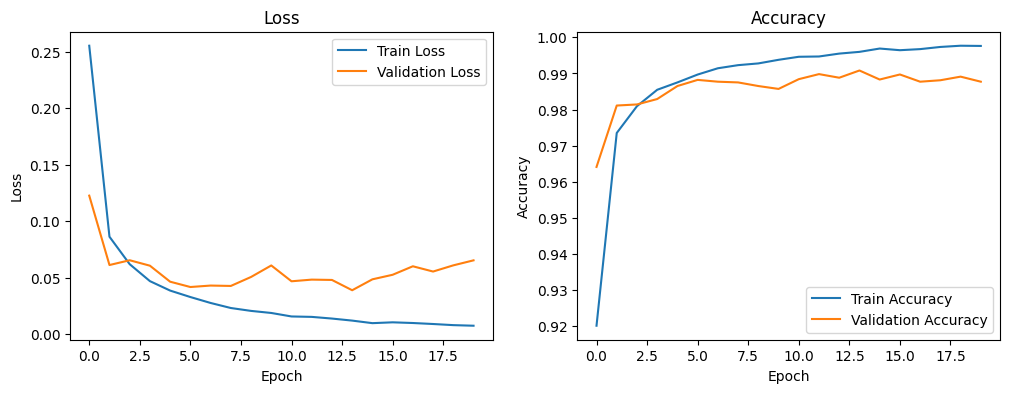

In [8]:

# Оцінка моделі на тестовій вибірці
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Побудова графіків навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
